In [1]:
import os
import numpy as np

In [2]:
%run all_functions.ipynb

The objective of the present notebook is to monitor the volume change across a construction site over multiple aerial surveys

#### Read and process the digital surface models (DSMs)

In [3]:
dsm_dir = 'data/DSMs'
dsm_files = os.listdir(dsm_dir)

In [4]:
# Separate all areas
dsm_all = []
for i in range(1, 10):
    dsm_all.append([f for f in dsm_files if f[:-4].endswith(f'{i}')])
dsm_all.append([f for f in dsm_files if f[:-4].endswith('tot')])
dsm_all.append([f for f in dsm_files if f[:-4].endswith('A')])

In [5]:
magnif = 1

In [6]:
dsm_dicts = []
for lst in dsm_all:
    dsm_dicts.append(read_DSMs(dsm_dir, lst, magnif))

dict_keys(['dsm1_clipped_B1', 'dsm2_clipped_B1', 'dsm3_clipped_B1'])
dict_keys(['dsm1_clipped_B2', 'dsm2_clipped_B2', 'dsm3_clipped_B2'])
dict_keys(['dsm1_clipped_B3', 'dsm2_clipped_B3', 'dsm3_clipped_B3'])
dict_keys(['dsm1_clipped_B4', 'dsm2_clipped_B4', 'dsm3_clipped_B4'])
dict_keys(['dsm1_clipped_B5', 'dsm2_clipped_B5', 'dsm3_clipped_B5'])
dict_keys(['dsm1_clipped_B6', 'dsm2_clipped_B6', 'dsm3_clipped_B6'])
dict_keys(['dsm1_clipped_B7', 'dsm2_clipped_B7', 'dsm3_clipped_B7'])
dict_keys(['dsm1_clipped_B8', 'dsm2_clipped_B8', 'dsm3_clipped_B8'])
dict_keys(['dsm1_clipped_B9', 'dsm2_clipped_B9', 'dsm3_clipped_B9'])
dict_keys(['dsm1_clipped_Btot', 'dsm2_clipped_Btot', 'dsm3_clipped_Btot'])
dict_keys(['dsm1_clipped_A', 'dsm2_clipped_A', 'dsm3_clipped_A'])


In [7]:
dsm_diffArraysPer1 = {}
diff_arrays = {}
for mydict in dsm_dicts:
    k1, k2 = list(mydict[0].keys())[:2]
    dsm_diffArraysPer1 = compute_periodDiff(mydict[0][k1], mydict[0][k2], '1', k1[13:])

In [8]:
dsm_diffArraysPer2 = {}
diff_arrays = {}
for mydict in dsm_dicts:
    k1, k2 = list(mydict[0].keys())[1:]
    dsm_diffArraysPer2 = compute_periodDiff(mydict[0][k1], mydict[0][k2], '2', k1[13:])

In [9]:
# Select the areas to visualise
dsm_toVis = {'1A': dsm_diffArraysPer1['A'],
             '1B': dsm_diffArraysPer1['Btot'],
             '2A': dsm_diffArraysPer2['A'],
             '2B': dsm_diffArraysPer2['Btot']}

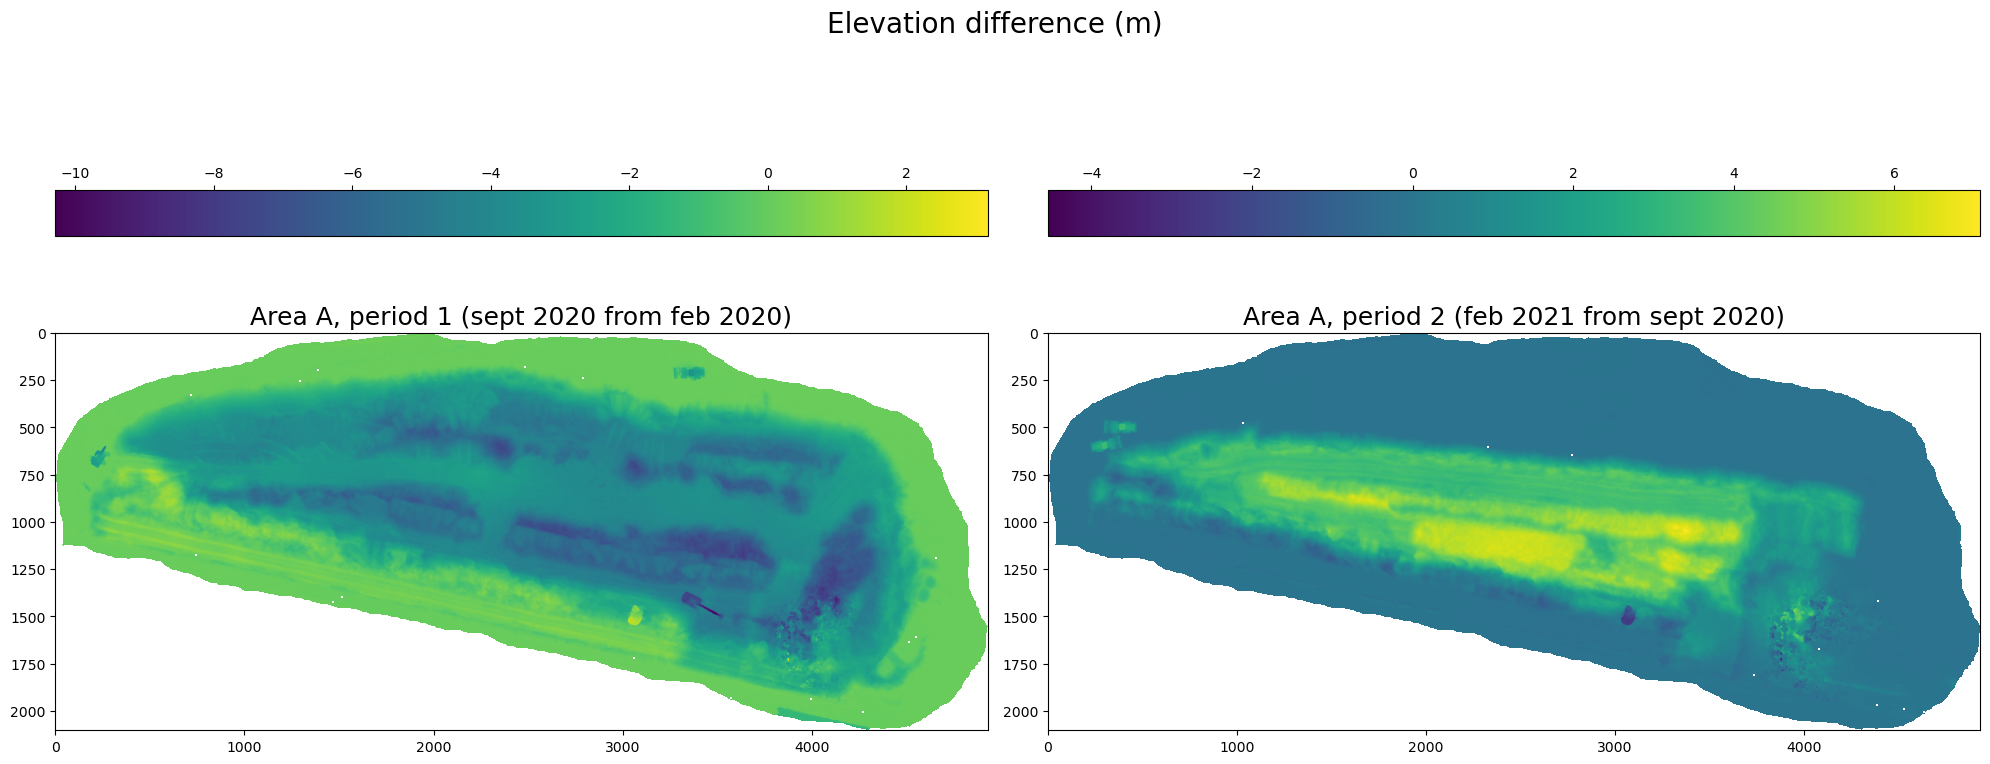

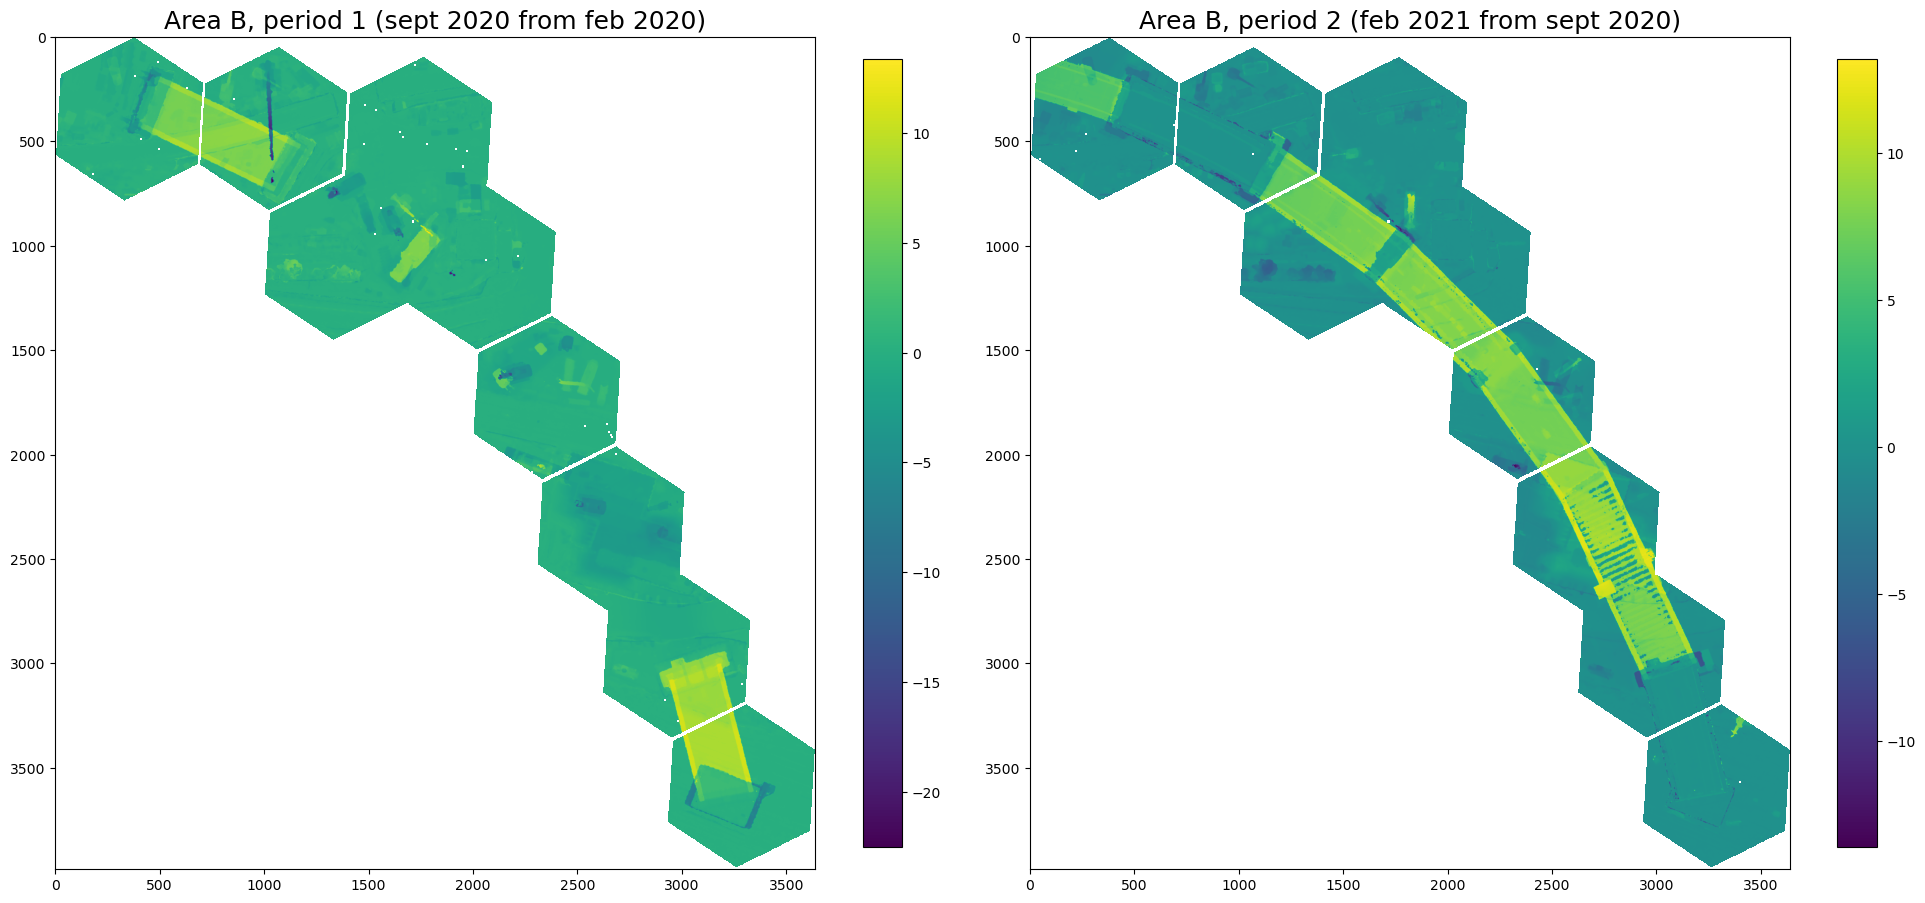

In [10]:
visualise(dsm_toVis)

#### Read the transformed point clouds and compute volumes

In [11]:
pc_dir = 'data/PC to raster'
pc_files = os.listdir(pc_dir)

In [12]:
pc_all = []
for i in range(1, 10):
    pc_all.append([f for f in pc_files if f[:-4].endswith(f'{i}')])
pc_all.append([f for f in pc_files if f[:-4].endswith('A')])

In [13]:
shapes = [sh[1] for sh in dsm_dicts[:-2]]
shapes.append(dsm_dicts[-1][1])
pcs_dicts = []
for lst, sh in zip(pc_all, shapes):
    pcs_dicts.append(read_DSMs(pc_dir, lst, magnif, sh))

dict_keys(['PC1_toRas_B1', 'PC2_toRas_B1', 'PC3_toRas_B1'])
dict_keys(['PC1_toRas_B2', 'PC2_toRas_B2', 'PC3_toRas_B2'])
dict_keys(['PC1_toRas_B3', 'PC2_toRas_B3', 'PC3_toRas_B3'])
dict_keys(['PC1_toRas_B4', 'PC2_toRas_B4', 'PC3_toRas_B4'])
dict_keys(['PC1_toRas_B5', 'PC2_toRas_B5', 'PC3_toRas_B5'])
dict_keys(['PC1_toRas_B6', 'PC2_toRas_B6', 'PC3_toRas_B6'])
dict_keys(['PC1_toRas_B7', 'PC2_toRas_B7', 'PC3_toRas_B7'])
dict_keys(['PC1_toRas_B8', 'PC2_toRas_B8', 'PC3_toRas_B8'])
dict_keys(['PC1_toRas_B9', 'PC2_toRas_B9', 'PC3_toRas_B9'])
dict_keys(['PC1_toRas_A', 'PC2_toRas_A', 'PC3_toRas_A'])


In [14]:
pcras_diffArraysPer1 = {}
diff_arrays = {}
for mydict in pcs_dicts:
    k1, k2 = list(mydict[0].keys())[:2]
    pcras_diffArraysPer1 = compute_periodDiff(mydict[0][k1], mydict[0][k2], '1', k1[10:])

In [15]:
pcras_diffArraysPer2 = {}
diff_arrays = {}
for mydict in pcs_dicts:
    k1, k2 = list(mydict[0].keys())[1:]
    pcras_diffArraysPer2 = compute_periodDiff(mydict[0][k1], mydict[0][k2], '2', k1[10:])

In [16]:
dsm_volume_changes_1 = compute_volumes(dsm_dicts, dsm_diffArraysPer1)
dsm_volume_changes_2 = compute_volumes(dsm_dicts, dsm_diffArraysPer2)

In [17]:
pcs_volume_changes_1 = compute_volumes(pcs_dicts, pcras_diffArraysPer1, 'pcras')
pcs_volume_changes_2 = compute_volumes(pcs_dicts, pcras_diffArraysPer2, 'pcras')

In [18]:
dsm_volume_changes = pd.concat([dsm_volume_changes_1, dsm_volume_changes_2],axis=1)
dsm_volume_changes.columns = ['DSM-derived: period 1', 'DSM-derived: period 2']
dsm_volume_changes['DSM-derived: cumulative (full year)'] = dsm_volume_changes['DSM-derived: period 1'] + dsm_volume_changes['DSM-derived: period 2']
dsm_volume_changes.loc['Btot'] = dsm_volume_changes[:-2].sum()

In [19]:
pcs_volume_changes = pd.concat([pcs_volume_changes_1, pcs_volume_changes_2],axis=1)
pcs_volume_changes.columns = ['PC-derived: period 1', 'PC-derived: period 2']
pcs_volume_changes['PC-derived: cumulative (full year)'] = pcs_volume_changes['PC-derived: period 1'] + pcs_volume_changes['PC-derived: period 2']
pcs_volume_changes.loc['Btot'] = pcs_volume_changes[:-1].sum()

In [20]:
changes_final = pd.concat([dsm_volume_changes, pcs_volume_changes], axis=1)
all_cols = changes_final.columns.tolist()
new_order = [all_cols[0], all_cols[3], all_cols[1], all_cols[4], all_cols[2], all_cols[5]]
changes_final = changes_final[new_order]

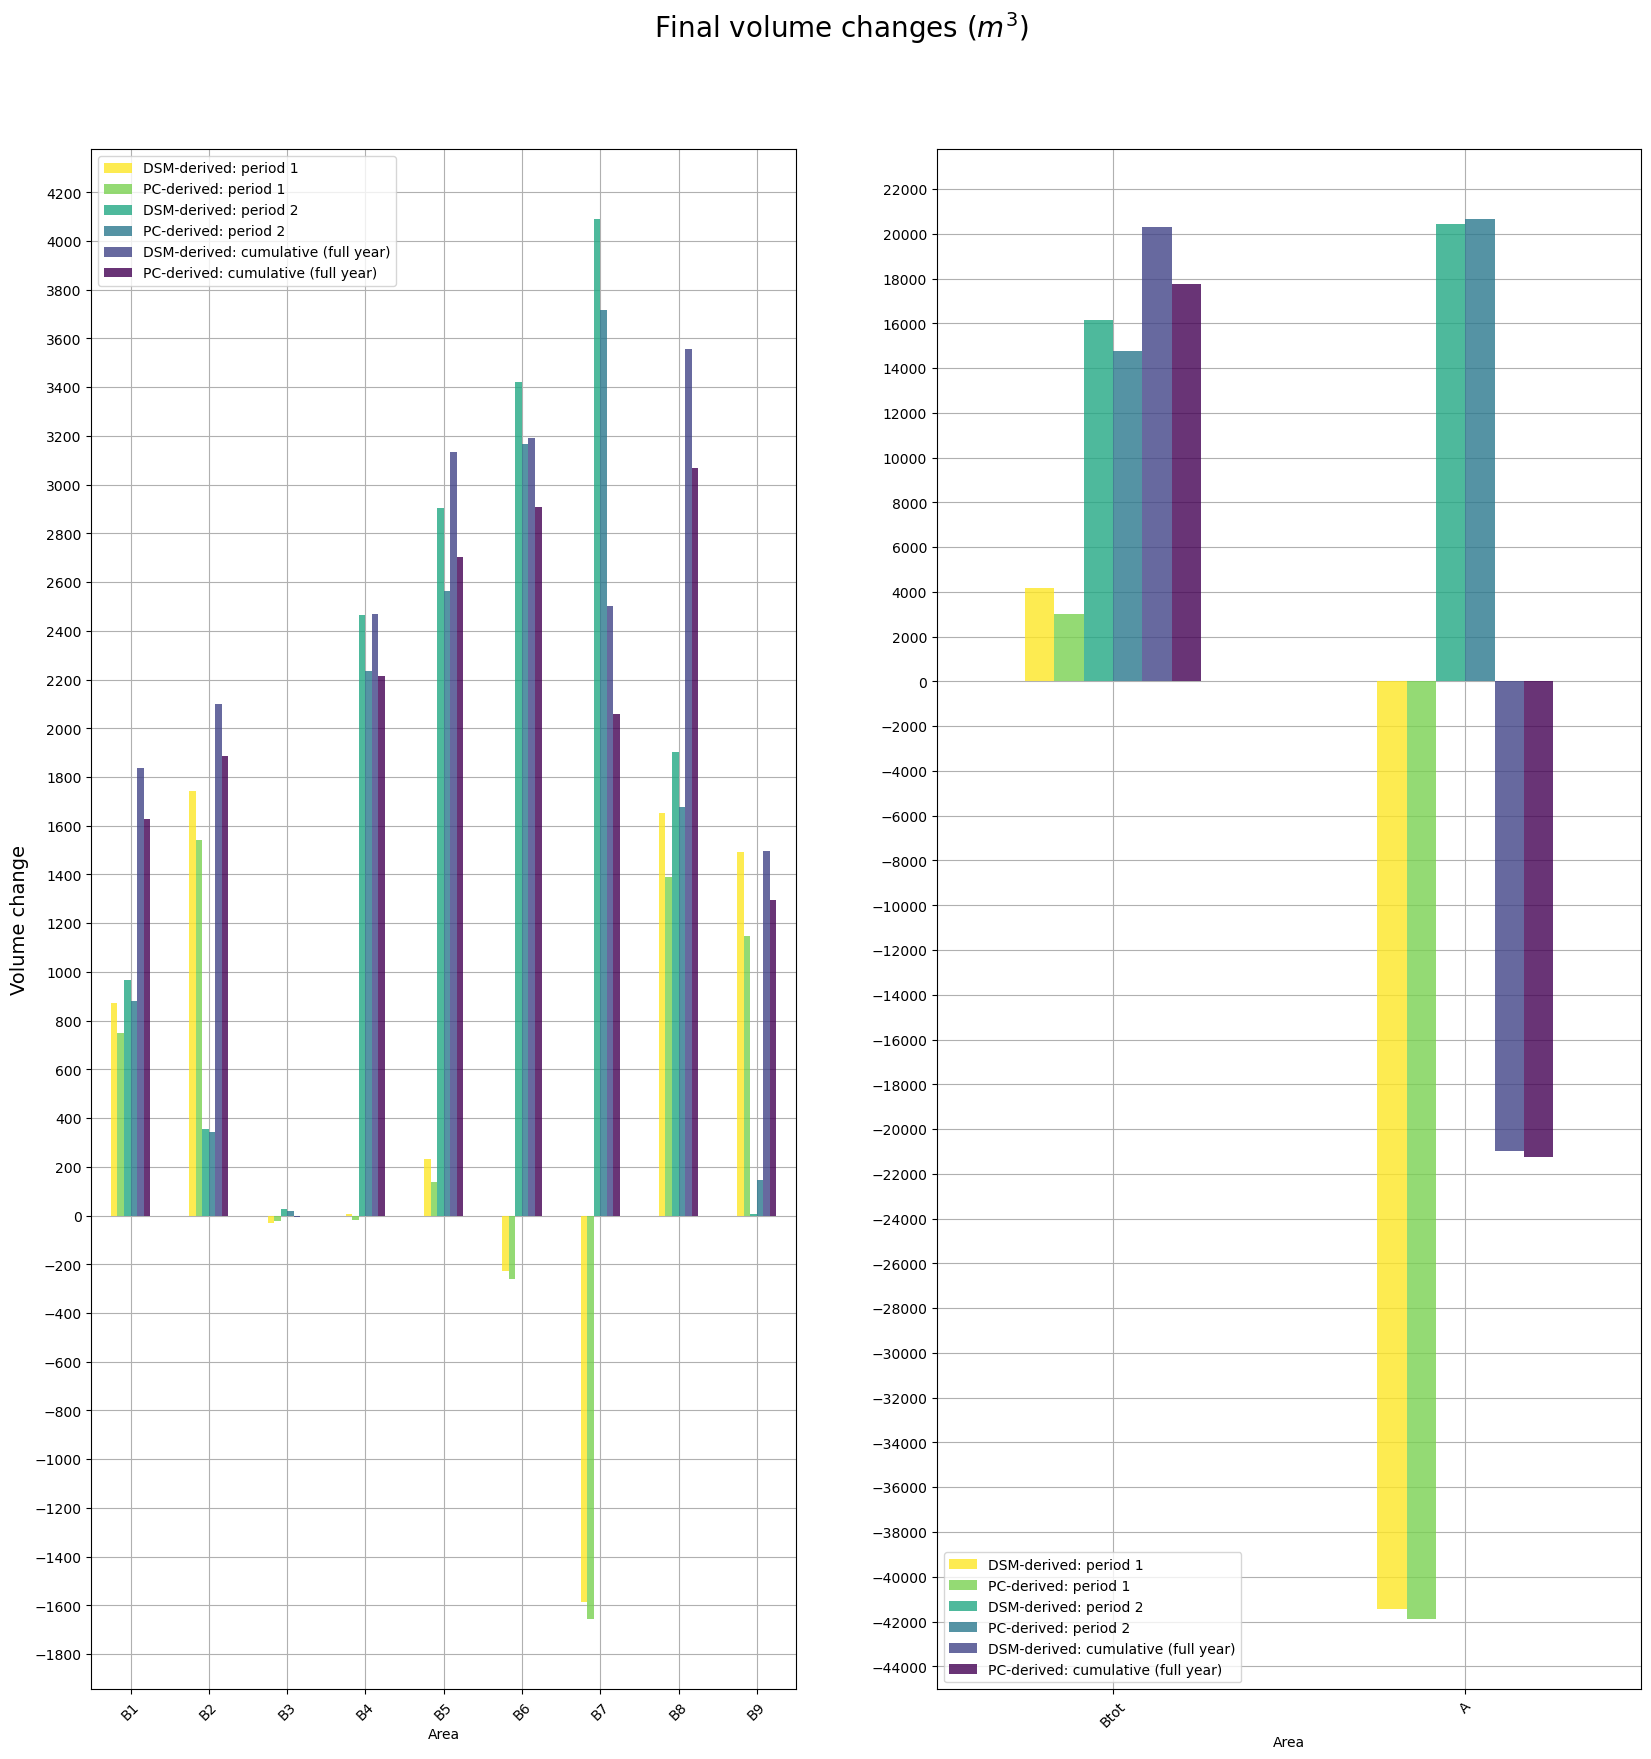

In [21]:
plot_volChange(changes_final)